# **1. Imports dependencies**

In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Metrics, model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes
from sklearn.ensemble import AdaBoostClassifier

In [3]:
print(os.listdir('/kaggle/input/breast-cancer-wisconsin-data'))

['data.csv']


# **2. Exploratory data analysis (EDA)**

to analyze and investigate data sets and summarize their main characteristics, often employing data visualization 
methods.

Here are the main reasons we use EDA:
* detection of mistakes
* checking of assumptions
* preliminary selection of appropriate models
* determining relationships among the explanatory variables, and
* assessing the direction and rough size of relationships between explanatory and outcome variables.

## 2.1 Load data (load and describe it)

In [4]:
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
print(f"Training data size is {data.shape}")

Training data size is (569, 33)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
data.duplicated().sum()

0

In [11]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace= True)

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## 2.1.1 what is my data types

In [13]:
# Get numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns.tolist()
print("Numeric Columns:", numeric_columns)

print("\n","-"*100,"\n")
# Get categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)

Numeric Columns: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

 ---------------------------------------------------------------------------------------------------- 

Categorical Columns: ['diagnosis']


## 2.1.2 countplot of diagnosis (future 'y') label

Number of Benign:  357
Number of Malignant :  212


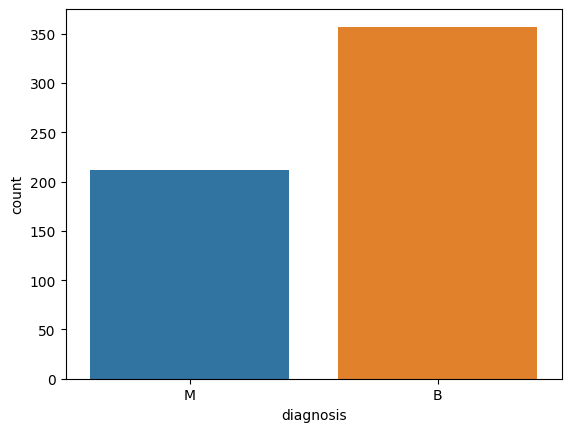

In [14]:
ax = sns.countplot(x = data['diagnosis'],label="Count")      
B, M = data['diagnosis'].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

# data['diagnosis'].value_counts()

## 2.2.0 Viz 

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Malignant cases: 212
Benign cases: 357


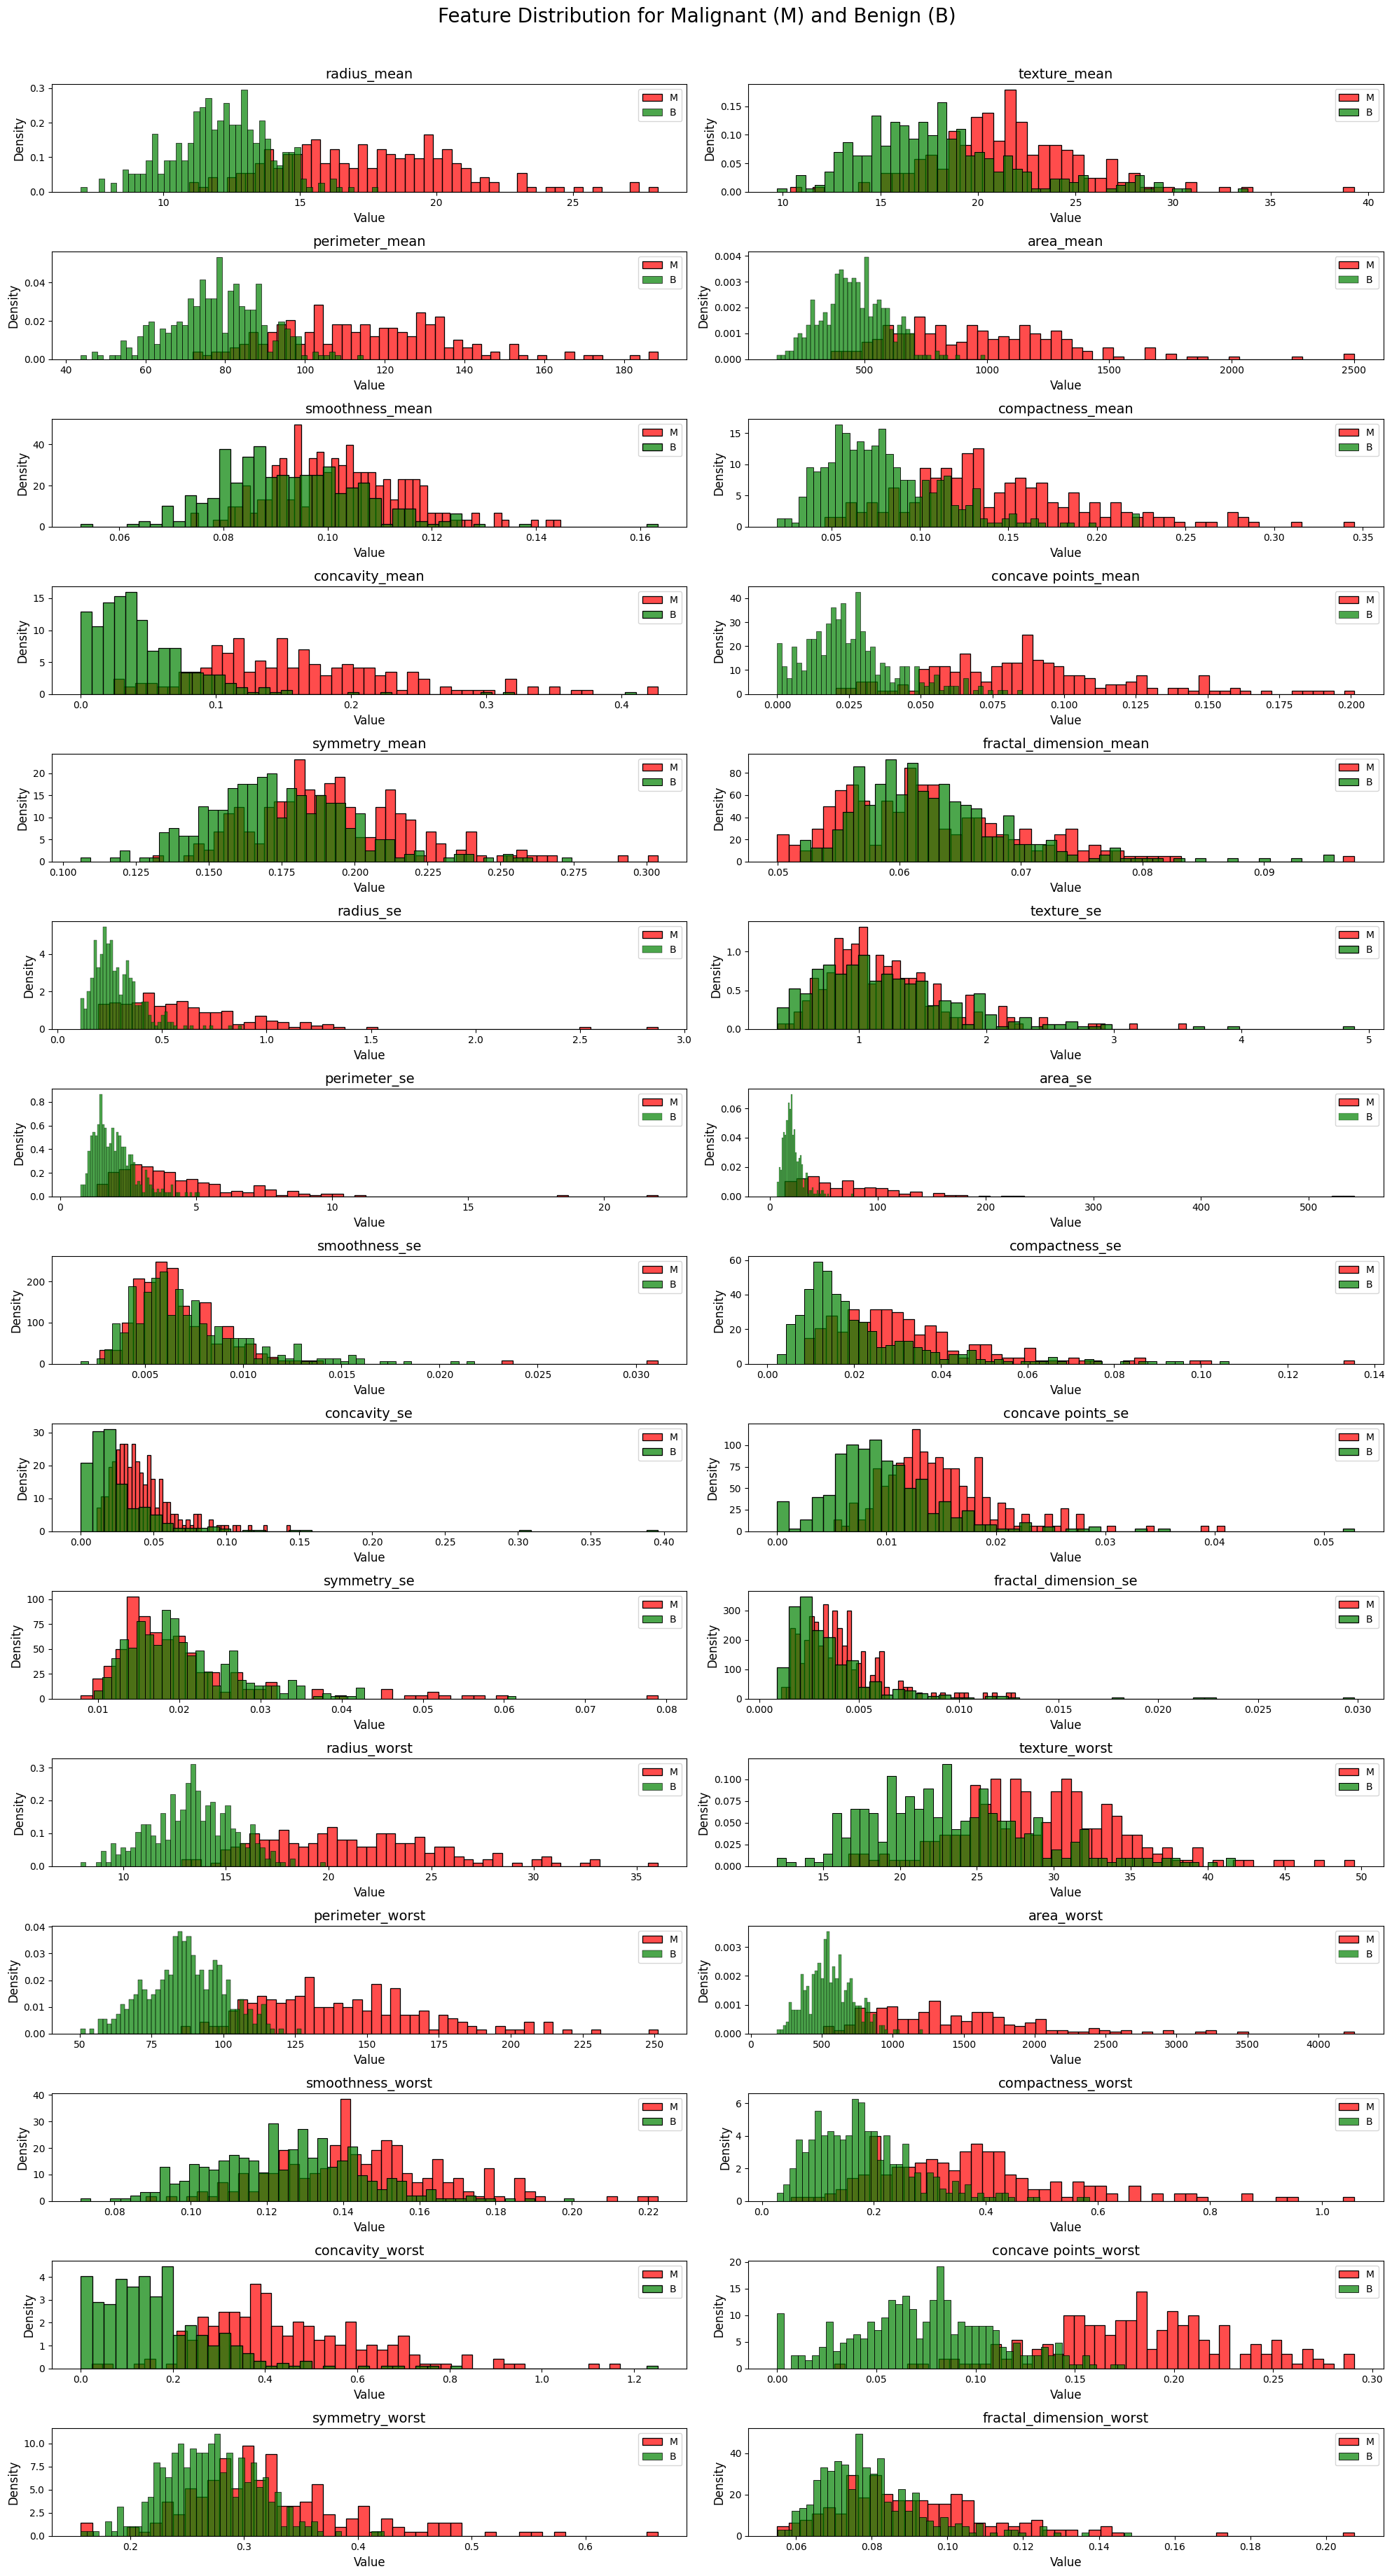

In [15]:
features_mean = numeric_columns
print(features_mean)

dfM = data[data['diagnosis'] == 'M']  # Malignant cases
dfB = data[data['diagnosis'] == 'B']  # Benign cases

print(f"Malignant cases: {dfM.shape[0]}")
print(f"Benign cases: {dfB.shape[0]}")

# Stack the data
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(20, 36))  # 6 rows, 5 columns for 30 features
axes = axes.ravel()

for idx, ax in enumerate(axes):
    if idx < len(features_mean):  # Check if feature exists
        ax.clear()  # Clear previous plots
        binwidth = (max(data[features_mean[idx]]) - min(data[features_mean[idx]])) / 50
        
        # Draw histograms using Seaborn
        sns.histplot(data=dfM, x=features_mean[idx], bins=int((max(data[features_mean[idx]]) - min(data[features_mean[idx]])) / binwidth), 
                     color='red', label='M', alpha=0.7, stat='density', kde=False, ax=ax)
        
        sns.histplot(data=dfB, x=features_mean[idx], bins=int((max(data[features_mean[idx]]) - min(data[features_mean[idx]])) / binwidth), 
                     color='green', label='B', alpha=0.7, stat='density', kde=False, ax=ax)

        # Title and labels
        ax.set_title(features_mean[idx], fontsize=14)
        ax.set_xlabel('Value', fontsize=12)
        ax.set_ylabel('Density', fontsize=12)

        # Legend
        ax.legend(loc='upper right')
    else:
        ax.axis('off')  # Hide unused subplots

plt.tight_layout()
plt.suptitle('Feature Distribution for Malignant (M) and Benign (B)', fontsize=20, y=1.02)
plt.show()


# 2.3 (Correlation Matrix + Checking for outliers)

## 2.3.1 Checking for outliers

In [15]:
outliers_info = {}
outlier_cleaned_data = data.copy()  # Create a copy of the original DataFrame

for column in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    outlier_count = data[(data[column] < lower_bound) | (data[column] > upper_bound)].shape[0]
    outliers_info[column] = outlier_count

    # Remove outliers by filtering the DataFrame directly
    outlier_cleaned_data = outlier_cleaned_data[
        (outlier_cleaned_data[column] >= lower_bound) & (outlier_cleaned_data[column] <= upper_bound)
    ]

# Display outlier information
for i, j in outliers_info.items():
    if j > 0:
        print(f'{i} has : {j} outliers')

radius_mean has : 14 outliers
texture_mean has : 7 outliers
perimeter_mean has : 13 outliers
area_mean has : 25 outliers
smoothness_mean has : 6 outliers
compactness_mean has : 16 outliers
concavity_mean has : 18 outliers
concave points_mean has : 10 outliers
symmetry_mean has : 15 outliers
fractal_dimension_mean has : 15 outliers
radius_se has : 38 outliers
texture_se has : 20 outliers
perimeter_se has : 38 outliers
area_se has : 65 outliers
smoothness_se has : 30 outliers
compactness_se has : 28 outliers
concavity_se has : 22 outliers
concave points_se has : 19 outliers
symmetry_se has : 27 outliers
fractal_dimension_se has : 28 outliers
radius_worst has : 17 outliers
texture_worst has : 5 outliers
perimeter_worst has : 15 outliers
area_worst has : 35 outliers
smoothness_worst has : 7 outliers
compactness_worst has : 16 outliers
concavity_worst has : 12 outliers
symmetry_worst has : 23 outliers
fractal_dimension_worst has : 24 outliers


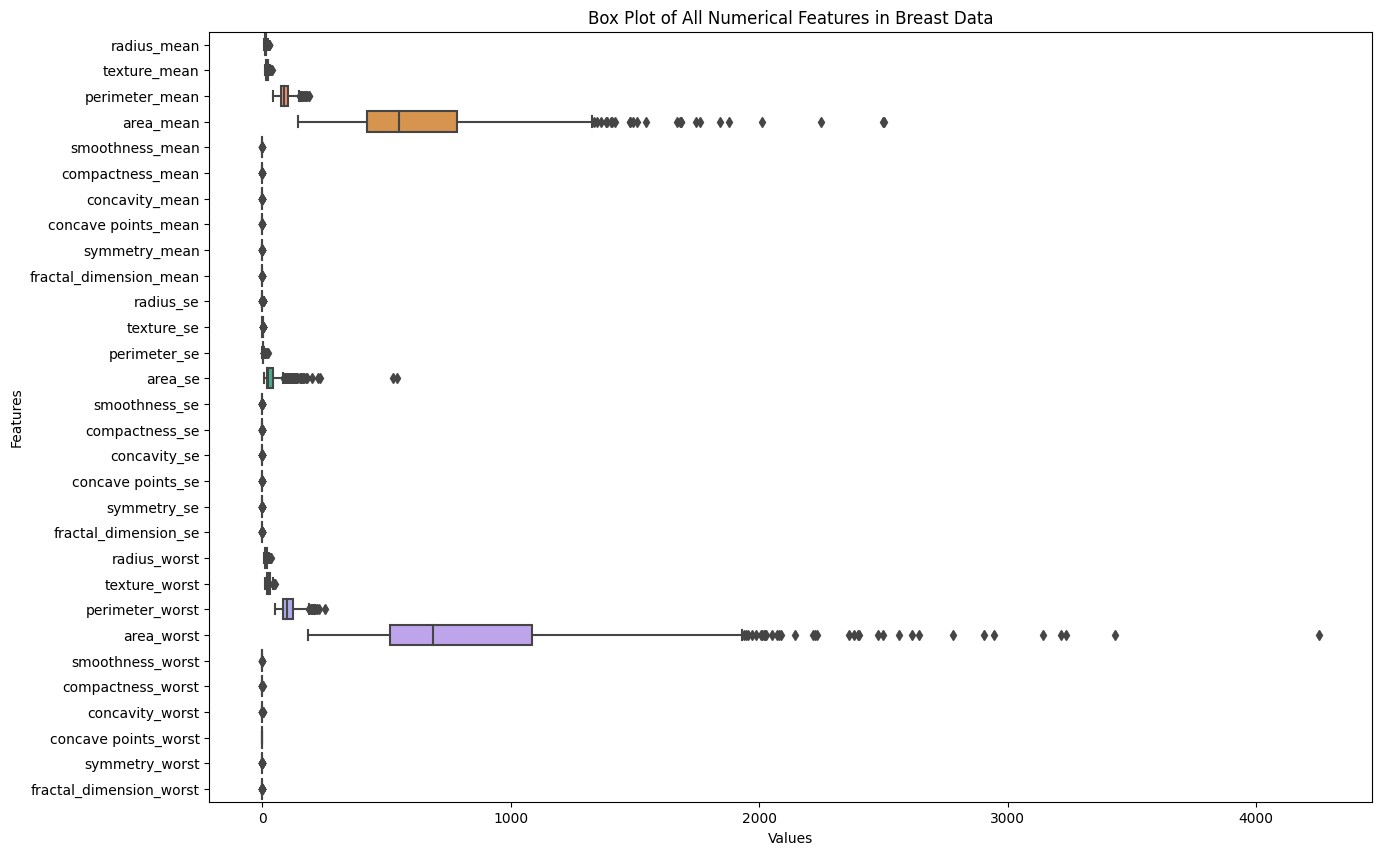

In [16]:
# Create a box plot for all numerical columns
plt.figure(figsize=(15, 10))  # Set figure size
sns.boxplot(data=data, orient="h")  # Horizontal box plot
plt.title('Box Plot of All Numerical Features in Breast Data')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

In [17]:
# Display the shape of the original and cleaned DataFrames
print(f"Original DataFrame shape: {data.shape}")
print(f"Cleaned DataFrame shape: {outlier_cleaned_data.shape}")

Original DataFrame shape: (569, 31)
Cleaned DataFrame shape: (398, 31)


## 2.3.2 Correlation Matrix

In [16]:
print(data['diagnosis'].isna().sum())  # NaN değer sayısını gösterir
print(data['diagnosis'].unique())  # Sütundaki tüm benzersiz değerleri gösterir

0
['M' 'B']


In [17]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
print(data['diagnosis'].head())  # İlk birkaç satırı göster

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


In [18]:
correlation_matrix = data.corr()
correlation_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


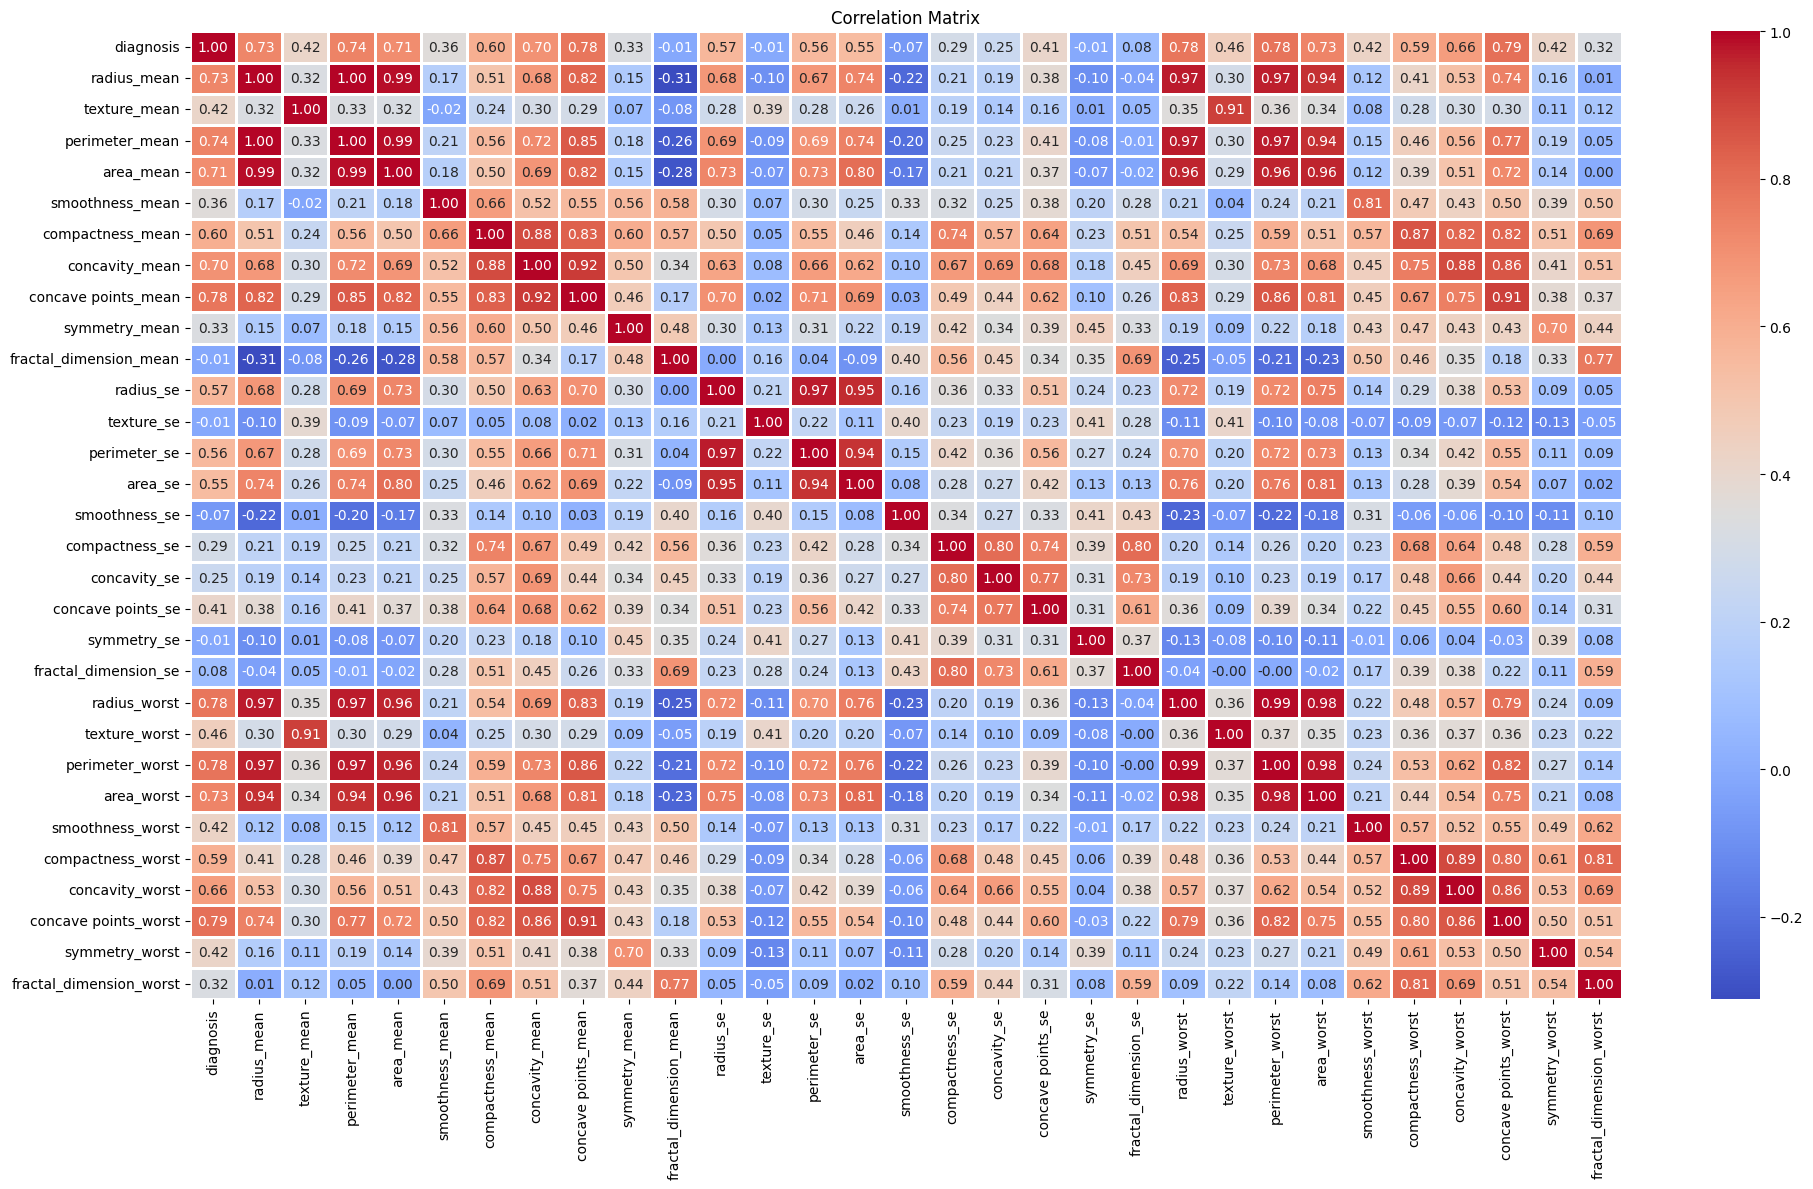

In [19]:
#heatmap
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, linewidths=1, annot=True, fmt = ".2f",cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [20]:
print(correlation_matrix['diagnosis'].sort_values(ascending=False))

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

## 2.4.0 Preprocessing data (Scaling, Encoding and Splitting Data)

In [21]:
target = 'diagnosis'

In [22]:
X = data.drop(target, axis=1)
y = data[target]

In [23]:
# Assuming X is a DataFrame
feature_names = X.columns.tolist()
print("Feature Names:", feature_names)

Feature Names: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

## 2.4.1 Scaling (MinMax + Standard + Robust + Normalization)

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
X_scaled = scaler.fit_transform(X)

## 2.4.2 Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

## 2.4.3 Splitting Data

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.20, random_state=42)

# Sonuçları kontrol etme
print("X_train şekli:", X_train.shape)
print("y_train şekli:", y_train.shape)
print("X_test şekli:", X_test.shape)
print("y_test şekli:", y_test.shape)

X_train şekli: (455, 30)
y_train şekli: (455,)
X_test şekli: (114, 30)
y_test şekli: (114,)


# **3. Model Development**

# 3.1 - Machine Learining 

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier, BayesianRidge, PassiveAggressiveClassifier, RidgeClassifier, Perceptron
from sklearn.ensemble import BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import BernoulliNB

# 20+ Model 
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Multi-Layer Perceptron': MLPClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(),
    'CatBoost Classifier': CatBoostClassifier(verbose=0),
    'XGBoost Classifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM Classifier': LGBMClassifier(),
    'Stochastic Gradient Descent': SGDClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Voting Classifier': VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier())]),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'Perceptron': Perceptron(),
    'Gaussian Process Classifier': GaussianProcessClassifier()
}


In [31]:
from sklearn.metrics import accuracy_score, classification_report

results = {}
for name, clf in classifiers.items(): 
    clf.fit(X_train, y_train)  # Modeli eğit

    # Sınıflandırıcı türüne göre uygun tahmin yöntemini seç
    if hasattr(clf, "predict_proba"):  # Eğer modelin predict_proba fonksiyonu varsa
        y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Pozitif sınıf olasılıklarını al
        y_pred = (y_pred_proba >= 0.5).astype(int)  # İkili sınıflara dönüştür
    elif hasattr(clf, "decision_function"):  # Eğer modelin decision_function fonksiyonu varsa
        y_pred_decision = clf.decision_function(X_test)  # Karar fonksiyonunu kullan
        y_pred = (y_pred_decision >= 0).astype(int)  # Eşik değeri 0 kullanarak sınıflara ayır
    else:
        y_pred = clf.predict(X_test)  # Diğer modeller için doğrudan predict kullan

    # Sonuçları yazdır ve kaydet
    print(f"Predictions of {name} : {y_pred}\n")
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, y_pred, zero_division=0)
    }



Predictions of Logistic Regression : [0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 1 1]

Predictions of Support Vector Classifier : [0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]

Predictions of K-Nearest Neighbors : [0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]

Predictions of Decision Tree Classifier : [0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0

In [32]:
for name, metrics in results.items():    
    print(f"### {name} ###")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("\n")
    

### Logistic Regression ###
Accuracy: 0.9737
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Support Vector Classifier ###
Accuracy: 0.9737
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### K-Nearest Neighbors ###
Accuracy: 0.9474
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93

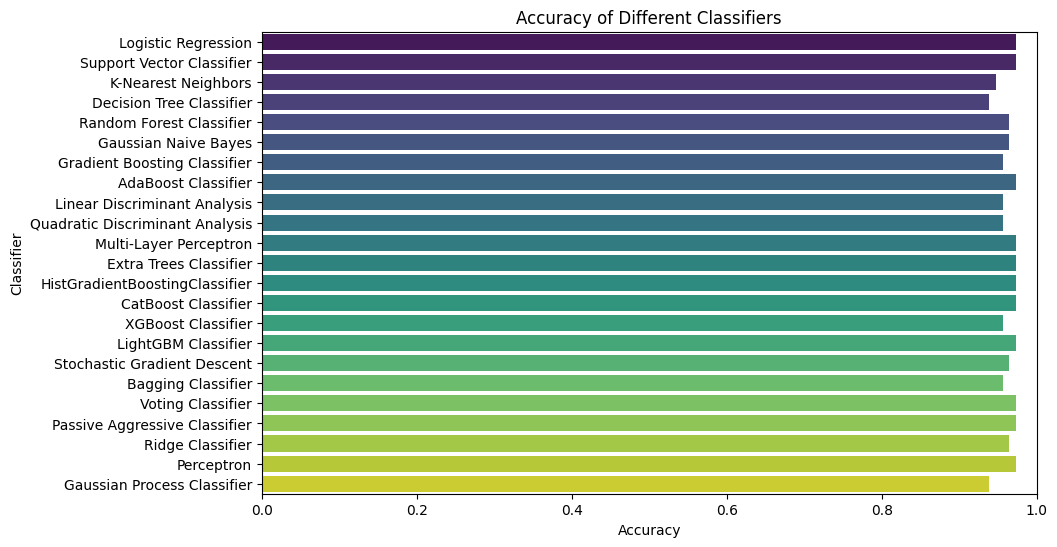

In [33]:
# Visualization of classifier accuracy
classifier_names = list(results.keys())
accuracies = [results[name]['Accuracy'] for name in classifier_names]

# Create a DataFrame for visualization
accuracy_data = pd.DataFrame({'Classifier': classifier_names, 'Accuracy': accuracies})

# Plot the accuracy using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Classifier', data=accuracy_data, palette='viridis')
plt.title('Accuracy of Different Classifiers')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.xlim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

In [34]:
accuracy_data = pd.DataFrame({'Classifier': classifier_names, 'Accuracy': accuracies})
accuracy_data_sorted = accuracy_data.sort_values(by='Accuracy', ascending=False)
accuracy_data_sorted.head(15)

,Classifier,Accuracy
0,Logistic Regression,0.973684
10,Multi-Layer Perceptron,0.973684
21,Perceptron,0.973684
19,Passive Aggressive Classifier,0.973684
18,Voting Classifier,0.973684
15,LightGBM Classifier,0.973684
13,CatBoost Classifier,0.973684
12,HistGradientBoostingClassifier,0.973684
1,Support Vector Classifier,0.973684
11,Extra Trees Classifier,0.973684


In [54]:
best_classifier_name = max(results, key=lambda name: results[name]['Accuracy'])
print(f"\nBest Classifier: {best_classifier_name}")


Best Classifier: Logistic Regression


### SVC

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Genişletilmiş SVC için hiperparametre grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  # Regularization parameter (daha geniş aralık)
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Farklı kernel türleri ekledim
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],  # Gamma için daha düşük değerler ekledim
    'degree': [2, 3, 4, 5],  # Sadece 'poly' kerneli için geçerli olan dereceler
    'coef0': [0.0, 0.1, 0.5, 1.0]  # 'poly' ve 'sigmoid' kernel için bağımsız terim
}

# SVC modeli
svc = SVC()

# GridSearchCV tanımlama
grid_search = GridSearchCV(svc, param_grid, refit=True,  cv=5, verbose=0, n_jobs=-1)
# random_search = RandomizedSearchCV(svc, param_distributions=param_dist, n_iter=20, cv=5, verbose=0, random_state=42, n_jobs=-1)


# Modeli Eğitme
grid_search.fit(X_train, y_train)
# random_search.fit(X_train, y_train)

# En iyi parametreler ve model
print("Best parameters found: ", grid_search.best_params_)
print("Best estimator: ", grid_search.best_estimator_)

# En iyi parametreler ve model
# print("Best parameters found: ", random_search.best_params_)
# print("Best estimator: ", random_search.best_estimator_)

Best parameters found:  {'C': 1, 'coef0': 1.0, 'degree': 5, 'gamma': 0.01, 'kernel': 'poly'}
Best estimator:  SVC(C=1, coef0=1.0, degree=5, gamma=0.01, kernel='poly')


In [57]:
results_df = pd.DataFrame(grid_search.cv_results_)
top_10 = results_df.sort_values(by='mean_test_score', ascending=False).head(10)
top_10[['mean_test_score', 'params']]

,mean_test_score,params
630,0.980220,"{'C': 1, 'coef0': 1.0, 'degree': 5, 'gamma': 0..."
1477,0.978022,"{'C': 1000, 'coef0': 0.5, 'degree': 3, 'gamma'..."
610,0.978022,"{'C': 1, 'coef0': 1.0, 'degree': 4, 'gamma': 0..."
1457,0.978022,"{'C': 1000, 'coef0': 0.5, 'degree': 2, 'gamma'..."
1337,0.978022,"{'C': 1000, 'coef0': 0.0, 'degree': 4, 'gamma'..."
954,0.978022,"{'C': 10, 'coef0': 1.0, 'degree': 5, 'gamma': ..."
1437,0.978022,"{'C': 1000, 'coef0': 0.1, 'degree': 5, 'gamma'..."
1497,0.978022,"{'C': 1000, 'coef0': 0.5, 'degree': 4, 'gamma'..."
1417,0.978022,"{'C': 1000, 'coef0': 0.1, 'degree': 4, 'gamma'..."
1517,0.978022,"{'C': 1000, 'coef0': 0.5, 'degree': 5, 'gamma'..."


In [29]:
# En iyi parametrelerle SVC modelini eğitme
best_svc = SVC(C=1, coef0=1.0, degree=5, gamma=0.01, kernel='poly')
best_svc.fit(X_train, y_train)

# Tahmin yapma
y_pred = best_svc.predict(X_test)

# Model performansı
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[71  0]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy Score:  0.9824561403508771


### AdaBoostClassifier

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# AdaBoost için parametre grid tanımı
param_grid = {
    'n_estimators': [50, 100, 200, 500],  # Öğrenici sayısı
    'learning_rate': [0.001, 0.01, 0.1, 1, 10],  # Öğrenme oranı
    'base_estimator__max_depth': [1, 2, 3, 4, 5],  # Zayıf öğrenici olarak Decision Tree'nin derinliği
}

# AdaBoost modelini DecisionTreeClassifier ile kullanma
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# GridSearchCV tanımlama
grid_search_adaboost = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Eğitme
grid_search_adaboost.fit(X_train, y_train)

# En iyi parametreler ve model
print("Best parameters found: ", grid_search_adaboost.best_params_)
print("Best estimator: ", grid_search_adaboost.best_estimator_)

AttributeError: 'NoneType' object has no attribute 'set_params'

In [154]:
best_ada = grid_search_adaboost.best_estimator_

# Test seti üzerinde tahmin yapma
y_pred = best_ada.predict(X_test)

# Performans metrikleri
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Set Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Set Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[70  1]
 [ 2 41]]


### XGBClassifier

In [79]:
from xgboost import XGBClassifier

# Define the XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Setting up GridSearchCV with XGBoost
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Fitting the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and estimator
print("Best parameters found: ", grid_search.best_params_)
print("Best estimator: ", grid_search.best_estimator_)

# Predicting on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
Classification Report:
               precision    recall  f1-score   support

           0       0

In [80]:
# Assign the best model
best_xgb_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_xgb_model.predict(X_test)

# Evaluate the results
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Set Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Set Accuracy:  0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[69  2]
 [ 2 41]]


In [81]:
# Check training and testing accuracy
train_accuracy = best_xgb_model.score(X_train, y_train)
test_accuracy = best_xgb_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Testing Accuracy: 0.9649122807017544


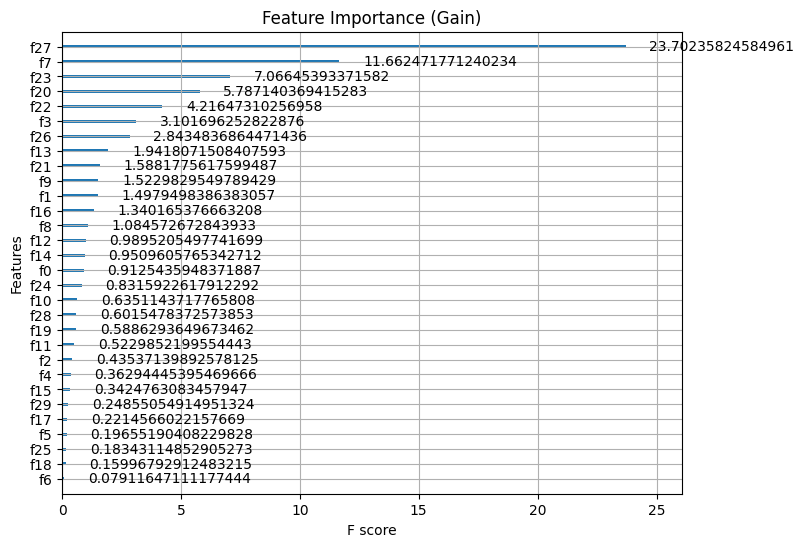

In [82]:
# Convert the model to a booster and then plot importance
booster = best_xgb_model.get_booster()
plt.rcParams.update({'figure.figsize': (8, 6)})

# Plot using gain instead of weight if there's no importance by weight
xgb.plot_importance(booster, importance_type='gain')
plt.title('Feature Importance (Gain)')
plt.show()


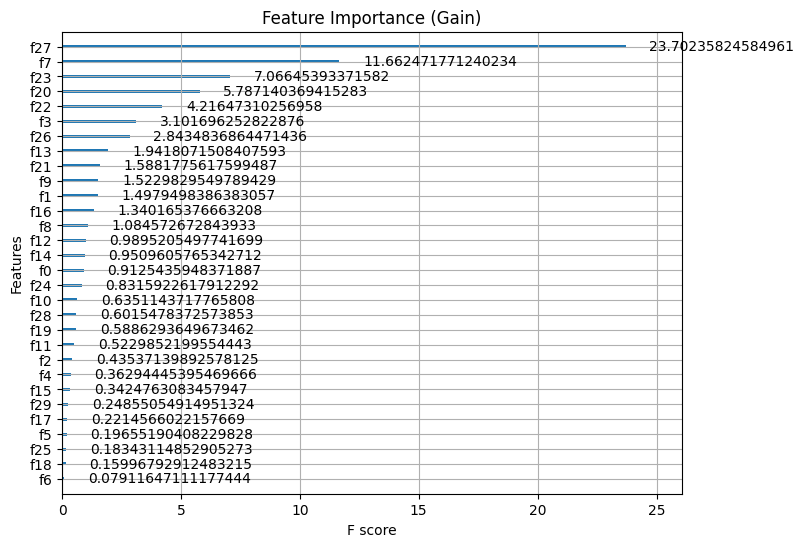

In [83]:
# Convert the model to a booster and then plot importance
booster = best_xgb_model.get_booster()
plt.rcParams.update({'figure.figsize': (8, 6)})

# Plot using gain instead of weight if there's no importance by weight
xgb.plot_importance(booster, importance_type='gain')
plt.title('Feature Importance (Gain)')
plt.show()


### LogisticRegression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Modeli başlat
logreg = LogisticRegression(solver='saga', random_state=42, max_iter=1000)

# Hiperparametre ızgarasını tanımlayın
param_grid = {
    'penalty': ['l2', 'l1','elasticnet'],  # L1 ve L2 ceza terimleri
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Düzenleme parametresi
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Çözümleyiciler
    'max_iter': [100, 200, 300, 400, 500]  # Maksimum iterasyon sayısı
}

# Grid Search'i başlat
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Modeli eğitin
grid_search.fit(X_train, y_train)

# En iyi hiperparametreleri yazdırın
best_parameters = grid_search.best_params_
print('En iyi hiperparametreler:', best_parameters)

# En iyi modelle tahmin yapın
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)

# Sonuçları yazdırın
print("Test Set Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 315 candidates, totalling 1575 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

En iyi hiperparametreler: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Test Set Accuracy:  0.9912280701754386
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Confusion Matrix:
 [[71  0]
 [ 1 42]]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [40]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C= 0.1, max_iter= 100, penalty= 'l2', solver= 'liblinear', 
                                 random_state = 42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Test Set Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Set Accuracy:  0.9912280701754386
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Confusion Matrix:
 [[71  0]
 [ 1 42]]


Test Set Accuracy:  0.9912280701754386
Classification Report:
               precision    recall  f1-score   support

           0     0.9861    1.0000    0.9930        71
           1     1.0000    0.9767    0.9882        43

    accuracy                         0.9912       114
   macro avg     0.9931    0.9884    0.9906       114
weighted avg     0.9913    0.9912    0.9912       114

Confusion Matrix:
 [[71  0]
 [ 1 42]]


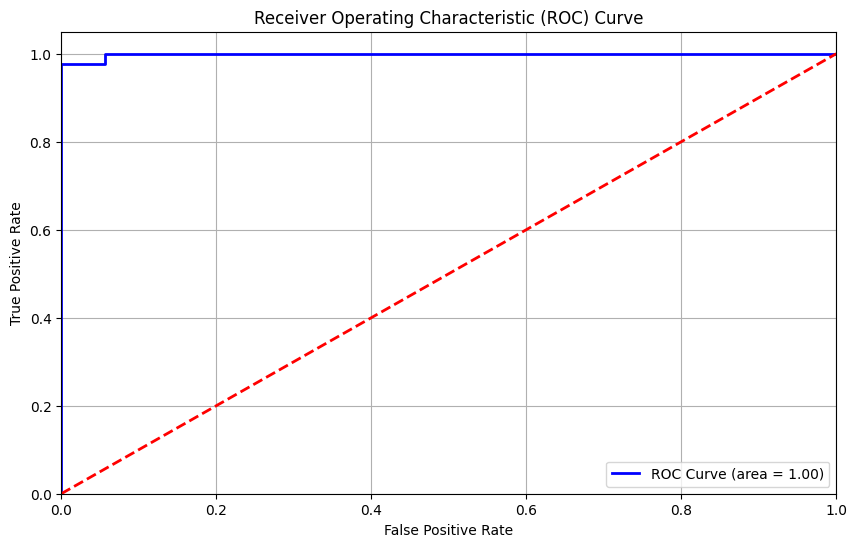

In [41]:
# Fit the Logistic Regression model
logreg = LogisticRegression(C=0.1, max_iter=100, penalty='l2', solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)

# Predict the labels
y_pred = logreg.predict(X_test)

# Print evaluation metrics
print("Test Set Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Get the predicted probabilities
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## 3.1.? Save Model

In [42]:
import joblib

joblib.dump(logreg, 'model.pkl')

['model.pkl']

## 3.2.0 Deep Learning Models

In [43]:
import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.layers import LeakyReLU

from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [44]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))
# Adding the second hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Showing model summary of the ANN
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [129]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=32, kernel_initializer='uniform', input_dim=30))
classifier.add(BatchNormalization())  # Adding Batch Normalization
classifier.add(LeakyReLU(alpha=0.1))  # Using Leaky ReLU

# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.2))

# Adding the second hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform'))
classifier.add(BatchNormalization())  # Adding Batch Normalization
classifier.add(LeakyReLU(alpha=0.1))  # Using Leaky ReLU

# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.2))

# Adding the second hidden layer
classifier.add(Dense(units=8, kernel_initializer='uniform'))
classifier.add(BatchNormalization())  # Adding Batch Normalization
classifier.add(LeakyReLU(alpha=0.1))  # Using Leaky ReLU

# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.2))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Showing model summary of the ANN
classifier.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,889 (7.38 KB)

 Trainable params: 1,777 (6.94 KB)

 Non-trainable params: 112 (448.00 B)

In [145]:
# Define learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9  # Decrease learning rate by 10% after each 10 epochs.

lr_scheduler = LearningRateScheduler(scheduler)

# Define early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_accuracy", # metrics to monitor
    patience=20, # how many epochs to wait before stopping
    verbose=1,
    mode="max", # we need the maximum accuracy.
    restore_best_weights=True, # restore model weights from the epoch with the best value of the monitored metric
)

# Define learning rate reduction on plateau
rp = keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy",
    factor=0.2,
    patience=5,
    verbose=1,
    mode="max",
    min_lr=0.00001, # minimum learning rate
)

# Add checkpoint callback to save the best model
checkpoint = ModelCheckpoint(
    "/kaggle/working/best_model.keras", # filepath to save the model
    monitor="val_accuracy", # metric to monitor
    verbose=1, 
    save_best_only=True, # save only the model with the best val_acc
    mode="max" # looking for the maximum value of val_acc
)

# Add callbacks to the training process
callbacks = [rp, checkpoint,lr_scheduler]

In [150]:
'''history = classifier.fit(X_train, y_train, batch_size=32, epochs=150,
                         validation_data=(X_test, y_test), callbacks=callbacks)'''

history = model.fit(X_train, y_train, batch_size=32, epochs=100,
                         validation_split=0.2, callbacks=callbacks)

Epoch 1/100
 1/12 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.6875 - loss: 0.6236
Epoch 1: val_accuracy did not improve from 0.94505
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7415 - loss: 0.5022 - val_accuracy: 0.5604 - val_loss: 0.6013 - learning_rate: 0.0010
Epoch 2/100
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8125 - loss: 0.3860
Epoch 2: val_accuracy did not improve from 0.94505
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8490 - loss: 0.3445 - val_accuracy: 0.7253 - val_loss: 0.4956 - learning_rate: 0.0010
Epoch 3/100
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9062 - loss: 0.1752
Epoch 3: val_accuracy did not improve from 0.94505
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8986 - loss: 0.2388 - val_accuracy: 0.8462 - val_loss: 0.4146 - learning_rate: 0.0010
Epoch 4/100
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9688 - loss: 0.1933
Epoch 4: val_accuracy did not improve from 0.94505
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

In [151]:
# Assuming X_test and y_test are your test dataset and labels
loss, accuracy = classifier.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9558 - loss: 0.4481 
Test Loss: 0.44195908308029175
Test Accuracy: 0.9649122953414917


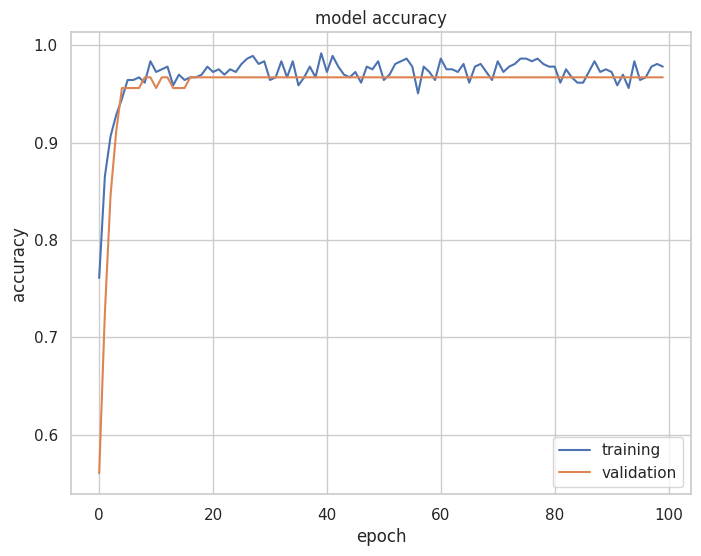

In [152]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [116]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [117]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[70,  1],
       [ 2, 41]])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


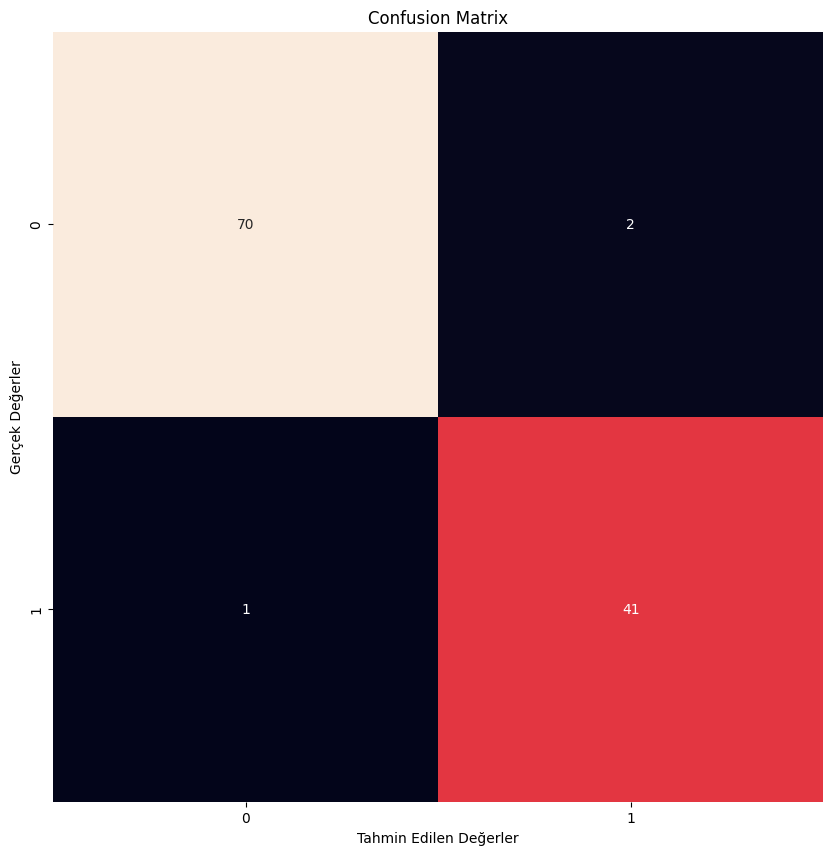

In [118]:
# Model tahminlerini al (olasılık tahmini)
y_pred_proba = classifier.predict(X_test)

# Olasılık tahminlerini sınıf tahminlerine çevir (eğer 0.5'ten büyükse 1, değilse 0 olarak sınıflandır)
y_pred = (y_pred_proba > 0.5).astype(int)

# Confusion matrix'i hesapla
mat = confusion_matrix(y_test, y_pred)

# Confusion matrix'i görselleştir
fig = plt.figure(figsize=(10, 10))  # Grafik boyutu
sns.heatmap(mat.T, square=True, annot=True, cbar=False, fmt='.0f')
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


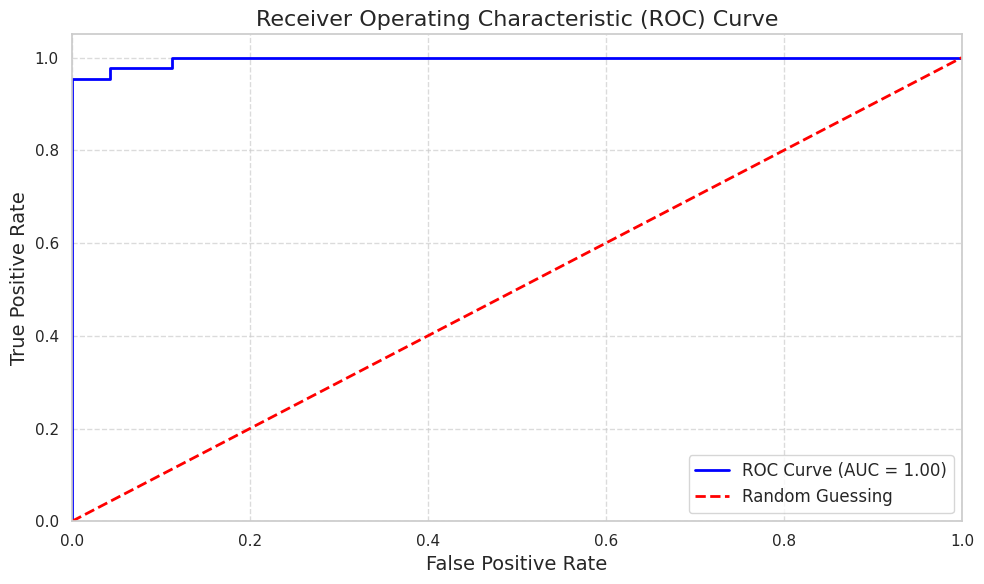

In [122]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Model tahminlerini al (olasılık tahmini)
y_pred_proba = classifier.predict(X_test)

# ROC eğrisini hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# AUC'yi hesapla
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')  # Seaborn stili

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')  # Diyagonal referans çizgisi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('roc_curve_enhanced.png')
plt.show()


In [120]:
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Classification Report:
               precision    recall  f1-score   support

           0     0.9722    0.9859    0.9790        71
           1     0.9762    0.9535    0.9647        43

    accuracy                         0.9737       114
   macro avg     0.9742    0.9697    0.9719       114
weighted avg     0.9737    0.9737    0.9736       114



# Referances

In [ ]:
https://www.kaggle.com/code/rahmasleam/breast-cancer-using-ann
https://www.kaggle.com/code/fareedalianwar/ann-breast-cancer
https://www.kaggle.com/code/ismailelyan/breast-cancer-whos-best-model-accuracy-96
    
    
https://www.kaggle.com/code/kanncaa1/feature-selection-and-data-visualization
https://www.kaggle.com/code/kanncaa1/statistical-learning-tutorial-for-beginners